# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

```python
X_train: pandas.DataFrame  # features
y_train: pandas.Series  # target
```

In [2]:
%%capture
!wget https://github.com/vdshk/ml/raw/main/Facebook%20Comment%20Volume%20Prediction/Dataset.tar.xz

In [3]:
!tar -xvf Dataset.tar.xz

Dataset/
Dataset/Testing/
Dataset/Testing/Features_TestSet.csv
Dataset/Testing/Test_Case_1.csv
Dataset/Testing/Test_Case_10.csv
Dataset/Testing/Test_Case_2.csv
Dataset/Testing/Test_Case_3.csv
Dataset/Testing/Test_Case_4.csv
Dataset/Testing/Test_Case_5.csv
Dataset/Testing/Test_Case_6.csv
Dataset/Testing/Test_Case_7.csv
Dataset/Testing/Test_Case_8.csv
Dataset/Testing/Test_Case_9.csv
Dataset/Training/
Dataset/Training/Features_Variant_1.csv
Dataset/Training/Features_Variant_2.csv
Dataset/Training/Features_Variant_3.csv
Dataset/Training/Features_Variant_4.csv
Dataset/Training/Features_Variant_5.csv


In [4]:
!rm Dataset.tar.xz

In [5]:
!head -n 5 Dataset/Training/Features_Variant_1.csv

634995,0,463,1,0.0,806.0,11.291044776119403,1.0,70.49513846124168,0.0,806.0,7.574626865671642,0.0,69.435826365571,0.0,76.0,2.6044776119402986,0.0,8.50550186882253,0.0,806.0,10.649253731343284,1.0,70.25478763764251,-69.0,806.0,4.970149253731344,0.0,69.85058043098057,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
634995,0,463,1,0.0,806.0,11.291044776119403,1.0,70.49513846124168,0.0,806.0,7.574626865671642,0.0,69.435826365571,0.0,76.0,2.6044776119402986,0.0,8.50550186882253,0.0,806.0,10.649253731343284,1.0,70.25478763764251,-69.0,806.0,4.970149253731344,0.0,69.85058043098057,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
634995,0,463,1,0.0,806.0,11.291044776119403,1.0,70.49513846124168,0.0,806.0,7.574626865671642,0.0,69.435826365571,0.0,76.0,2.6044776119402986,0.0,8.50550186882253,0.0,806.0,10.649253731343284,1.0,70.25478763764251,-69.0,806.0,4.970149253731344,0.0,69.85058043098057,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
634995,0,463,1,0.0,806.0,11.291044776119

In [6]:
df = pd.read_csv(
    filepath_or_buffer='Dataset/Training/Features_Variant_1.csv',
    header=None,
    sep=',',
    )
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [7]:
X_train, y_train = df.drop(columns=53), df[53]
X_train.head(), y_train.head()

(       0   1    2   3    4      5          6   ...  46  47  48  49  50  51  52
 0  634995   0  463   1  0.0  806.0  11.291045  ...   0   0   0   0   0   0   1
 1  634995   0  463   1  0.0  806.0  11.291045  ...   0   0   0   0   0   1   0
 2  634995   0  463   1  0.0  806.0  11.291045  ...   0   0   0   0   0   0   1
 3  634995   0  463   1  0.0  806.0  11.291045  ...   0   1   0   0   0   0   0
 4  634995   0  463   1  0.0  806.0  11.291045  ...   0   0   0   1   0   0   0
 
 [5 rows x 53 columns], 0    0
 1    0
 2    0
 3    0
 4    0
 Name: 53, dtype: int64)

In [8]:
(X_train.shape, y_train.shape)

((40949, 53), (40949,))

# EDA

In [9]:
X_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
count,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000
mean,1313813.74754,4676.13375,44800.25170,24.25478,1.58624,443.33385,55.72038,35.64553,67.46415,0.21947,285.18743,22.18665,7.50372,40.47421,0.02410,268.35827,19.64969,4.92154,38.72885,1.49725,415.39530,52.63159,34.04237,63.15491,-220.04662,275.40372,2.53696,-2.02090,55.84100,55.72038,22.18665,19.64969,52.63159,2.53696,35.32203,163.65247,117.24982,0.00000,23.76783,0.12235,0.14330,0.14975,0.15749,0.14403,0.14616,0.13693,0.14164,0.13251,0.13763,0.14860,0.15085,0.14389,0.14489
std,6785751.74785,20593.18486,110933.79757,19.95058,20.75317,496.69520,86.93355,69.96023,81.56825,10.05515,374.44173,36.93066,21.77876,54.27777,1.98136,327.06384,31.09411,13.24580,50.84643,18.71547,472.38025,81.26428,66.15308,76.40398,281.81418,373.33061,17.54491,14.72087,73.81113,136.97571,77.12426,71.07858,128.17992,94.20297,20.91686,376.26439,945.00667,0.00000,1.91983,0.32769,0.35038,0.35683,0.36427,0.35113,0.35327,0.34377,0.34868,0.33904,0.34452,0.35570,0.35790,0.35098,0.35199
min,36.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1366.00000,-204.00000,-210.50000,-288.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1366.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,36734.00000,0.00000,698.00000,9.00000,0.00000,45.00000,5.52727,2.00000,8.27876,0.00000,26.00000,1.91129,0.00000,4.10946,0.00000,26.00000,2.03030,0.00000,4.09458,0.00000,42.00000,5.21818,2.00000,7.60021,-310.00000,23.00000,-0.48322,-2.00000,5.99095,2.00000,0.00000,0.00000,2.00000,-6.00000,17.00000,38.00000,2.00000,0.00000,24.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,292911.00000,0.00000,7045.00000,18.00000,0.00000,241.00000,23.37410,12.00000,35.06914,0.00000,118.00000,8.43750,2.00000,17.38271,0.00000,116.00000,8.58427,1.00000,18.63998,0.00000,224.00000,21.85938,12.00000,32.36885,-92.00000,109.00000,0.27381,0.00000,25.54717,11.00000,2.00000,0.00000,10.00000,0.00000,35.00000,97.00000,13.00000,0.00000,24.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,1204214.00000,99.00000,50264.00000,32.00000,0.00000,717.00000,71.82883,42.00000,102.55495,0.00000,405.00000,29.00552,8.00000,60.76033,0.00000,381.00000,24.84252,5.00000,54.52316,0.00000,676.00000,67.91379,40.00000,96.26692,-21.00000,379.00000,2.97468,0.00000,81.20929,46.00000,12.00000,9.00000,44.00000,3.00000,53.00000,172.00000,61.00000,0.00000,24.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,486972297.00000,186370.00000,6089942.00000,106.00000,2341.00000,2341.00000,2341.00000,2341.00000,731.39456,1923.00000,2079.00000,1923.00000,1923.00000,469.53878,324.00000,1605.00000,437.68421,433.00000,533.63856,1923.00000,2184.00000,1923.00000,1923.00000,703.14405,1923.00000,2079.00000,1923.00000,1923.00000,749.70960,2341.00000,2079.00000,1605.00000,2184.00000,2079.00000,72.00000,21480.00000,144860.00000,0

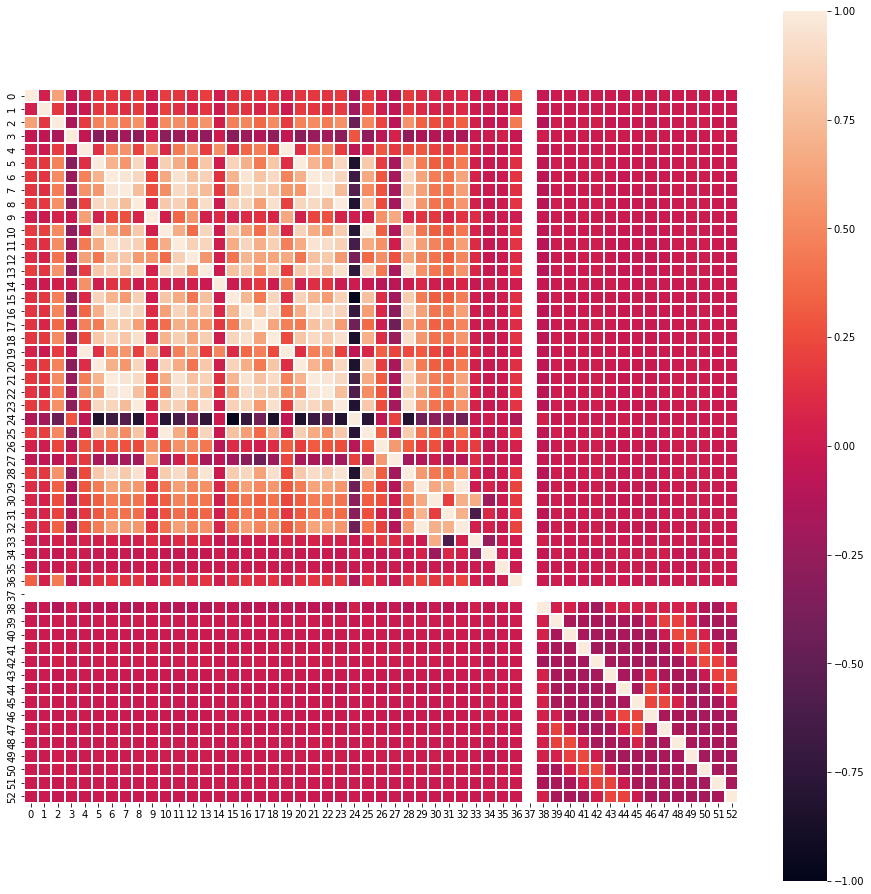

In [10]:
plt.figure(figsize=(16, 16))
sns.heatmap(
    data=X_train.corr(),
    linewidth=1,
    linecolor='w',
    square=True,
    vmin=-1.0,
    vmax=1.0,
);

# Normalize data

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train))

In [12]:
X_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
count,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000,40949.00000
mean,0.00270,0.02509,0.00736,0.22147,0.00068,0.18938,0.02380,0.01523,0.09224,0.00011,0.13718,0.01154,0.00390,0.08620,0.00007,0.16720,0.04489,0.01137,0.07258,0.00078,0.19020,0.02737,0.01770,0.08982,0.34842,0.20999,0.09985,0.12934,0.07448,0.02380,0.01067,0.01224,0.02410,0.39725,0.49058,0.00762,0.00080,0.00000,0.98991,0.12235,0.14330,0.14975,0.15749,0.14403,0.14616,0.13693,0.14164,0.13251,0.13763,0.14860,0.15085,0.14389,0.14489
std,0.01393,0.11050,0.01822,0.19001,0.00887,0.21217,0.03714,0.02988,0.11152,0.00523,0.18011,0.01920,0.01133,0.11560,0.00612,0.20378,0.07104,0.03059,0.09528,0.00973,0.21629,0.04226,0.03440,0.10866,0.08568,0.16353,0.00822,0.00666,0.09845,0.05851,0.03710,0.04429,0.05869,0.02734,0.29051,0.01752,0.00652,0.00000,0.08347,0.32769,0.35038,0.35683,0.36427,0.35113,0.35327,0.34377,0.34868,0.33904,0.34452,0.35570,0.35790,0.35098,0.35199
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00008,0.00000,0.00011,0.07619,0.00000,0.01922,0.00236,0.00085,0.01132,0.00000,0.01251,0.00099,0.00000,0.00875,0.00000,0.01620,0.00464,0.00000,0.00767,0.00000,0.01923,0.00271,0.00104,0.01081,0.32107,0.09943,0.09844,0.12935,0.00799,0.00085,0.00000,0.00000,0.00092,0.39478,0.23611,0.00177,0.00001,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00060,0.00000,0.00116,0.16190,0.00000,0.10295,0.00998,0.00513,0.04795,0.00000,0.05676,0.00439,0.00104,0.03702,0.00000,0.07227,0.01961,0.00231,0.03493,0.00000,0.10256,0.01137,0.00624,0.04603,0.38735,0.13710,0.09879,0.13026,0.03408,0.00470,0.00096,0.00000,0.00458,0.39652,0.48611,0.00452,0.00008,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,0.00247,0.00053,0.00825,0.29524,0.00000,0.30628,0.03068,0.01794,0.14022,0.00000,0.19481,0.01508,0.00416,0.12940,0.00000,0.23738,0.05676,0.01155,0.10217,0.00000,0.30952,0.03532,0.02080,0.13691,0.40894,0.25537,0.10006,0.13026,0.10832,0.01965,0.00577,0.00561,0.02015,0.39739,0.73611,0.00801,0.00041,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


# Linear Regression

In [13]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, iterations=100):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.b = 0.0
        self.W = np.zeros(n_features)
    
        for _ in range(self.iterations):
            y_pred = X @ self.W + self.b

            b_grad = 2 * np.sum(y_pred - y) / n_samples
            self.b -= self.learning_rate * b_grad

            W_grad = 2 * (X.T @ (y_pred - y)) / n_samples
            self.W -= self.learning_rate * W_grad
        
    def predict(self, X):
        return X @ self.W + self.b

# Evaluate model with Cross Validation

In [14]:
from sklearn.model_selection import KFold

kf5 = KFold(n_splits=5, shuffle=True)

In [15]:
columns = [i + j for i in ["E", "STD", "R2", "RMSE"] for j in ["-train", "-test"]]
index = [f"fold_{i + 1}" for i in range(5)]
results = pd.DataFrame(index=index, columns=columns)

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

fold = 1

for train_index, test_index in kf5.split(X_train):
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    X_test_fold, y_test_fold = X_train.iloc[test_index], y_train.iloc[test_index]

    model = LinearRegression(learning_rate=0.3, iterations=400)
    model.fit(X_train_fold, y_train_fold)

    y_pred_train_fold = model.predict(X_train_fold)
    y_pred_test_fold = model.predict(X_test_fold)

    results.at[f"fold_{fold}", "E-train"] = (y_train_fold.to_numpy() - y_pred_train_fold.to_numpy()).mean()
    results.at[f"fold_{fold}", "E-test"] = (y_test_fold.to_numpy() - y_pred_test_fold.to_numpy()).mean()
    results.at[f"fold_{fold}", "STD-train"] = (y_train_fold.to_numpy() - y_pred_train_fold.to_numpy()).std()
    results.at[f"fold_{fold}", "STD-test"] = (y_test_fold.to_numpy() - y_pred_test_fold.to_numpy()).std()
    results.at[f"fold_{fold}", "R2-train"] = r2_score(y_train_fold.to_numpy(), y_pred_train_fold.to_numpy())
    results.at[f"fold_{fold}", "R2-test"] = r2_score(y_test_fold.to_numpy(), y_pred_test_fold.to_numpy())
    results.at[f"fold_{fold}", "RMSE-train"] = mean_squared_error(y_train_fold.to_numpy(), y_pred_train_fold.to_numpy(), squared=False)
    results.at[f"fold_{fold}", "RMSE-test"] = mean_squared_error(y_test_fold.to_numpy(), y_pred_test_fold.to_numpy(), squared=False)
    
    fold += 1

results.apply(lambda s: s.apply('{0:.5f}'.format))

,E-train,E-test,STD-train,STD-test,R2-train,R2-test,RMSE-train,RMSE-test
fold_1,-0.05856,0.45527,29.13638,36.10146,0.27162,0.20368,29.13644,36.10433
fold_2,-0.05518,0.12330,30.86137,30.30029,0.23416,0.30684,30.86142,30.30054
fold_3,-0.05599,-0.07808,30.03379,33.15756,0.26203,0.22019,30.03384,33.15766
fold_4,-0.06179,-0.71582,32.21373,22.95519,0.25079,0.30470,32.21379,22.96635
fold_5,-0.05819,-0.09057,30.90620,29.57073,0.25526,0.25183,30.90626,29.57087
